## Keras Convolutional Neural Networks with MNIST data set

**Convolutional Neural Networks or CNN**

A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other. The pre-processing required in a ConvNet is much lower as compared to other classification algorithms. While in primitive methods filters are hand-engineered, with enough training, ConvNets have the ability to learn these filters/characteristics.

The architecture of a ConvNet is analogous to that of the connectivity pattern of Neurons in the Human Brain and was inspired by the organization of the Visual Cortex. Individual neurons respond to stimuli only in a restricted region of the visual field known as the Receptive Field. A collection of such fields overlap to cover the entire visual area.

**We are uisng MNIST dataset**

**MNIST Dataset**

The data files contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

**We will use keras to build the model**

## 1. Data 

In [2]:
# Load data set from Keras

from keras.datasets import mnist

(x_train,y_train), (x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 30s 3us/step


In [3]:
x_train.shape  # We got 60000 images (28x28 images) with single color channel that is grayscale

(60000, 28, 28)

In [4]:
y_train.shape   # We got 60000 labels

(60000,)

In [5]:
# Let's peek into our data
import matplotlib.pyplot as plt
%matplotlib inline


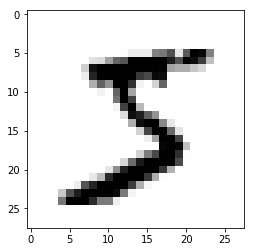

In [7]:
plt.imshow(x_train[0],cmap='gray_r')  # image

In [8]:
y_train[0]   # label

5

## Prepare data for keras model

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

We can't feed our labels in this way into our model because our model might not able to understand that these are categories.

So to prevent that from happening we have convert these labels to onehot encoding

In [10]:
from keras.utils.np_utils import to_categorical

y_cat_train=to_categorical(y_train,10)
y_cat_test=to_categorical(y_test,10)

In [12]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

**So now as you see our label number 1 which is 5 turns to onehot encoding i.e, in this specific array all indexes out of 10 are zero expect the index 5 which is 1 that means index five is our true label**

In [13]:
## Normalized data
x_train=x_train/x_train.max()

x_test=x_test/x_test.max()

In [14]:
x_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [15]:
x_test.max() # Our array values now confined between range 0 and 1

1.0

In [16]:
# Reshape the data 

# add color channel to the data set

x_train=x_train.reshape((60000,28,28,1))

In [17]:
x_train.shape

(60000, 28, 28, 1)

In [18]:
x_test=x_test.reshape((10000,28,28,1))

In [19]:
x_test.shape

(10000, 28, 28, 1)

## Build model using keras

In [20]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [22]:
# Initailize Sequential model

model=Sequential()

#Convolutional Layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation="relu"))

# Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))

#Flatten Layer from 2D to 1D
model.add(Flatten())

# hidden layer
model.add(Dense(128,activation='relu'))  # neuron units = 128 because it's not a colored image

# output layer
model.add(Dense(10,activation="softmax"))

# Compile the model
model.compile(loss="categorical_crossentropy",optimizer='rmsprop',metrics=["accuracy"])




In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


## Training the model

In [25]:
model.fit(x_train,y_cat_train,epochs=3)

Epoch 1/3
60000/60000 [==============================] - 58s 974us/step - loss: 0.1446 - acc: 0.9566
Epoch 2/3
60000/60000 [==============================] - 58s 969us/step - loss: 0.0499 - acc: 0.9854
Epoch 3/3
60000/60000 [==============================] - 60s 1ms/step - loss: 0.0362 - acc: 0.9892


## Evaluate the model

In [26]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 2s 229us/step


[0.04003175396593869, 0.9876]

In [29]:
model.metrics_names

['loss', 'acc']

In [30]:
from sklearn.metrics import classification_report

In [31]:
predictions=model.predict_classes(x_test)

In [32]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99       980
          1       0.99      1.00      1.00      1135
          2       0.99      0.98      0.99      1032
          3       0.99      0.99      0.99      1010
          4       0.99      0.99      0.99       982
          5       0.98      0.99      0.99       892
          6       0.99      0.98      0.99       958
          7       0.98      0.99      0.98      1028
          8       0.98      0.98      0.98       974
          9       0.99      0.99      0.99      1009

avg / total       0.99      0.99      0.99     10000



### Our CNN keras model works quite well